# Deep Learning CS6073 Assignment 11
    Akhil Devarashetti
    04/22/2020

### Question

    DL46.py is an autoencoder to be trained with bdata1.csv.
    Run this program
    capture the scatter plot of the codes and
    display the reconstructed data.
    Comment on the appearance of data clustering or "denoising" without a training set of "data without noise".
    
   ---
    
    DL47.py is the same autoencoder.
    After training, the encoder parameter is shown and 
    the user is prompted to select one of the two features learned.
    (Select one that has the first five weights and 
    the last five have opposite signs, if possible.)
    Then a gradient ascent will be executed on a random input with the result a "visualization" of the feature.
    Add code to the program, so for the same trained autoencoder and the same chosen feature,
    you also perform gradient descent (maybe on a different random input).
    (Instead of "add" the gradient to input, you may do "sub" for gradient descent.)
    
   ---
    
    DL45.py is an incarnation of d2l's GAN with bdata1 as the real_X against fake_X generated by net_G.
    A net_D tries to discriminate the two but net_G may see the current output of net_D on its fake data to improve its data generation.
    This program is likely to be trapped into mode collapse or other unpleasant result with a few iterations.
    Run it and show the best result you can get.


---
# DL46.py

    DL46.py is an autoencoder to be trained with bdata1.csv.
    Run this program
    capture the scatter plot of the codes and
    display the reconstructed data.
    Comment on the appearance of data clustering or "denoising" without a training set of "data without noise".

In [33]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [26]:
data3 = torch.tensor(pd.read_csv("bdata1.csv").to_numpy(), dtype=torch.float32)
print(data3)

tensor([[0., 1., 1., 1., 1., 1., 0., 1., 0., 0.],
        [1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1., 1.]])


In [4]:
model1 = nn.Sequential(
	nn.Linear(10, 2, bias=False),
	nn.Linear(2, 10, bias=False))

optimizer = optim.SGD(model1.parameters(), 1e-2, momentum=0.3, nesterov=True)
loss_fun = nn.MSELoss()

In [5]:
num_epochs = 5000

for epoch in range(1, num_epochs + 1):
    p = model1(data3)
    loss = loss_fun(p, data3)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

	if epoch == 1 or epoch % 1000 == 0:
		print('Epoch {}, Loss {}'.format(epoch, float(loss)))

Epoch 1, Loss 0.6618431806564331
Epoch 1000, Loss 0.2147756814956665
Epoch 2000, Loss 0.1371237337589264
Epoch 3000, Loss 0.09738676995038986
Epoch 4000, Loss 0.09347891062498093
Epoch 5000, Loss 0.0930076539516449


In [10]:
codes = model1[0](data3).data.T
print(codes)

tensor([[ 0.9920,  0.3900,  0.4395,  1.0429,  0.6831,  1.8804,  1.5716,  1.3314,
          1.3280,  1.0637],
        [ 1.1481,  1.1336,  1.4519,  0.8724,  1.4437,  0.3978, -0.1900, -0.0901,
         -0.1819,  0.1614]])


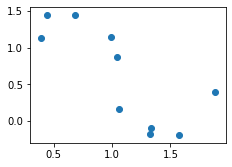

Reconstructed: 
[[1 1 1 1 1 1 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]]
Real: 
[[0 1 1 1 1 1 0 1 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 0 0 1 1 0 1 0 0]
 [1 1 1 1 1 0 0 0 1 0]
 [1 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 1 1 1 0 1]
 [0 0 0 0 1 0 1 0 1 1]]


In [35]:
plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.scatter(codes[0], codes[1])
plt.show()

reconstructed = model1(data3).gt(0.5).int()

print("Reconstructed: ")
print(reconstructed.numpy().astype(np.int32))

print("Real: ")
print(data3.numpy().astype(np.int32))

## Comment

The autoencoder in general is recognizing two kinds of data patterns.
It is failing to capture the fine details in the data, but doing a good job at generalizing the data pattern.
The hidden layer that encodes the input must encode all the information required for reconstruction into two floating point numbers. Then the decoder would use these two floats and recreate the input.
However, the autoencoder finds it difficult to capture and recreate the "noisy" elements (the fine details) of the input with just two units in the hidden layer.

This results in a the decoder generating a more generalized data rather than a very specific data point.
Thats the reason that I can infer for the "denoising" of the data after passing it though the autoencoder.

Comment on the scatter plot:
It looks like the relationship between the weights of the two neurons is that they are inversely proportional. When the weight for nuron 1 on input 1 (code[0][0]) is higher, the weight for the neuron 2 on the same input (code[1][0]) is low. This is seen for all the weights of the two neurons.

---

# DL47.py

    DL47.py is the same autoencoder.
    After training, the encoder parameter is shown and 
    the user is prompted to select one of the two features learned.
    (Select one that has the first five weights and the last five have opposite signs, if possible.)
    Then a gradient ascent will be executed on a random input with the result a "visualization" of the feature.
    Add code to the program, so for the same trained autoencoder and the same chosen feature,
    you also perform gradient descent (maybe on a different random input).
    (Instead of "add" the gradient to input, you may do "sub" for gradient descent.)

In [37]:
list(model1[0].parameters())

[Parameter containing:
 tensor([[ 0.1321,  0.0495,  0.0101,  0.0711,  0.1767,  0.1990,  0.4031,  0.4857,
           0.2436,  0.2402],
         [ 0.2701,  0.3183,  0.4030,  0.1427,  0.3178, -0.0162, -0.0482, -0.0175,
          -0.0081, -0.1000]], requires_grad=True)]

In [38]:
print('Enter the hidden node (0 or 1) whose feature you want to enhance')
input1 = int(input())

Enter the hidden node (0 or 1) whose feature you want to enhance
1


In [40]:
data4 = torch.tensor(np.random.random((1, 10)), dtype=torch.float32, requires_grad=True)
print(data4)
print(data4.gt(0.5).int())

tensor([[0.8528, 0.2930, 0.4550, 0.1334, 0.1538, 0.7639, 0.8828, 0.0642, 0.5089,
         0.0411]], requires_grad=True)
tensor([[1, 0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)


In [41]:
for i in range(5):
    c = model1[0](data4)
    c[0][input1].backward()
    data4 = data4.add(data4.grad * 0.5).clone().detach().requires_grad_(True)
    print(data4.gt(0.5).int())

tensor([[1, 0, 1, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)
tensor([[1, 1, 1, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)
tensor([[1, 1, 1, 0, 1, 1, 1, 0, 0, 0]], dtype=torch.int32)
tensor([[1, 1, 1, 0, 1, 1, 1, 0, 0, 0]], dtype=torch.int32)
tensor([[1, 1, 1, 0, 1, 1, 1, 0, 0, 0]], dtype=torch.int32)


## Gradient Descent on random input
This will make the input look more like the data that neuron 1 activates the most which is of the type where zeros are on left, and ones on the right `[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]`.

In [43]:
data5 = torch.tensor(np.random.random((1, 10)), dtype=torch.float32, requires_grad=True)
print(data5)
print(data5.gt(0.5).int())

tensor([[0.2912, 0.7072, 0.0998, 0.1542, 0.4988, 0.7374, 0.8183, 0.3873, 0.7616,
         0.1649]], requires_grad=True)
tensor([[0, 1, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)


In [44]:
for i in range(5):
    c = model1[0](data5)
    c[0][input1].backward()
    data5 = data5.sub(data5.grad * 0.5).clone().detach().requires_grad_(True)
    print(data5.gt(0.5).int())

tensor([[0, 1, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)
tensor([[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)
tensor([[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)
tensor([[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)
tensor([[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)


---
# DL45.py

    DL45.py is an incarnation of d2l's GAN with bdata1 as the real_X against fake_X generated by net_G.
    A net_D tries to discriminate the two but net_G may see the current output of net_D on its fake data to improve its data generation.
    This program is likely to be trapped into mode collapse or other unpleasant result with a few iterations.
    Run it and show the best result you can get.


In [45]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [46]:
data1 = pd.read_csv("bdata1.csv")
data2 = data1.to_numpy()
real_X = torch.tensor(data2, dtype=torch.float32)
print(real_X.gt(0.5).int())

tensor([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 1]], dtype=torch.int32)


In [47]:
batch_size, latent_dim, n = 10, 2, 10
net_G = nn.Sequential(nn.Linear(latent_dim, n))

In [54]:
Z = torch.tensor(np.random.normal(0, 1, size=(batch_size, latent_dim)), 
                 dtype=torch.float32)
fake_X = net_G(Z)
print(Z)
# print(fake_X)
print(fake_X.gt(0.5).int())

tensor([[ 0.1637, -1.1303],
        [ 0.5227, -0.0152],
        [-2.2803, -0.5095],
        [-1.7380, -0.1835],
        [ 0.8742, -1.5675],
        [-1.7220,  2.1002],
        [-1.1817, -0.5826],
        [-3.5056,  0.1477],
        [ 1.3975, -1.3721],
        [ 0.3178, -1.4008]])
tensor([[0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 0, 1, 1, 1, 1, 1]], dtype=torch.int32)


In [49]:
net_D = nn.Sequential(
    nn.Linear(n, latent_dim),
    nn.ReLU(),
    nn.Linear(latent_dim, 1),
    nn.Sigmoid())

ones = torch.ones((batch_size,1))
zeros = torch.zeros((batch_size,1))

In [74]:
lr_D, lr_G, num_epochs = 0.05, 0.01, 100
trainer_D = optim.Adam(net_D.parameters(), lr_D)
trainer_G = optim.Adam(net_G.parameters(), lr_G)
loss = nn.BCELoss()

In [51]:
def update_D():
    """Update discriminator"""
    real_Y = net_D(real_X)
    fake_X = net_G(Z)
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones) + loss(fake_Y, zeros)) / 2
    trainer_D.zero_grad()
    loss_D.backward()
    trainer_D.step()
    return float(loss_D.sum())

In [52]:
def update_G(): 
    """Update generator"""
    # Recomputing fake_Y is needed since net_D is changed.
    fake_X = net_G(Z)
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones)
    trainer_G.zero_grad()
    loss_G.backward()
    trainer_G.step()
    return float(loss_G.sum())

In [75]:
num_epochs = 5000
for epoch in range(1, num_epochs+1):
    loss_G = update_G()
    loss_D = update_D()
    Z = torch.tensor(np.random.normal(0, 1, size=(batch_size, latent_dim)), 
                 dtype=torch.float32)
    if (epoch % 1000 == 0):
        print('epoch', epoch)
        print(loss_G, loss_D)
        new_fake_X = net_G(Z)
        print('new fakes')
        print(new_fake_X.gt(0.5).int())
        print("discriminator's output to new fakes")
        print(net_D(new_fake_X))


epoch 1000
0.6931471824645996 0.6931471824645996
new fakes
tensor([[1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]], dtype=torch.int32)
discriminator's output to new fakes
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
epoch 2000
0.6931471824645996 0.6931471824645996
new fakes
tensor([[0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 

In [76]:
Z = torch.tensor(np.random.normal(0, 1, size=(batch_size, latent_dim)), 
                 dtype=torch.float32)

new_fake_X = net_G(Z)
print('Fake Data: ')
print(new_fake_X.gt(0.5).int())
print("Actual Data:")
print(real_X.gt(0.5).int())

Fake Data: 
tensor([[1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 1, 0, 0, 0, 1, 1, 1, 1, 1]], dtype=torch.int32)
Actual Data:
tensor([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 1]], dtype=torch.int32)


### Comment:
The GAN doesn't always generate the best data.
Infact, the discriminator cannot distinguish between the real or fake data.

The above is one of the better generated data.
We can see that at index 1 of fake data `[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]`, it is similat the the first half of actual data i.e. more ones on left side, zeros on right side `[1, 1, 1, 1, 1, 0, 0, 0, 1, 0]`.
At the last index (9) of the fake data `[0, 1, 0, 0, 0, 1, 1, 1, 1, 1]`, we can see that this data is similar to the second type of real data i.e. more zeros on left, ones on right `[0, 0, 0, 0, 0, 1, 1, 1, 1, 0]`.

However, the data at indices 0 `[1, 1, 1, 0, 1, 1, 1, 0, 1, 1]`, 5 `[0, 1, 0, 1, 0, 1, 1, 0, 0, 0]` and 6 `[0, 1, 0, 1, 1, 1, 1, 0, 0, 0]` the data does not look regular, but is similar to the real data at index 3 `[1, 1, 0, 0, 1, 1, 0, 1, 0, 0]`.